# This is some sample code that generates 3 urns, sampls from them, and calculates the fraction of white marbles for each urn 

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns
import random

In [2]:
np.random.seed(898)
#Number of urns
n_urns = 3
# alpha to generate dispersion of propbabilities
alpha = [1,1]
# Urns generated with different ratios
urns = np.random.dirichlet(alpha, n_urns)

In [3]:
urns

array([[0.68713824, 0.31286176],
       [0.69943519, 0.30056481],
       [0.42934757, 0.57065243]])

In [4]:

# Function that constructs an urn  passing the number of trials and probability array for the urn. 
def Category(trials, prob):
	x = np.random.multinomial(trials, prob, 1)
	return x



# function that takes the urns stored in outcomes_list and samples N_picks for N_Trials each
def color_samples(N_Trials, N_picks):
	
		

    urn_samples = []
    for urn in outcomes_list:
        sublist = []
        for _ in range(N_Trials):
            urnH0_draws = random.sample(urn,N_picks)
            sublist.append(urnH0_draws)
        urn_samples.append(sublist)
		
	# store the draws as color data
    urnh0_draws_colors = []
	# converts the draws from urnH0_draws into colors
    for urn in urn_samples:
        colors = []
        for trial in urn:
            color = []
            for i in range(len(trial)):
                if trial[i] == '1':
                    color.append('White')
                else:
                    color.append('Black')
            colors.append(color)
        urnh0_draws_colors.append(colors)
    return urnh0_draws_colors


In [80]:
occurences_list = []
# outcomes of each urn as strings
outcomes_list = []
# outcomes of each urn as ints
outcomes_int = []
N_marbles_urn = 10000
# constructs an urn  passing the number of rolls and the probability. Here, the number of marbles is set to N = 100000
for urn in urns:
	occurences = Category(N_marbles_urn, urn)[0]
	occurences_list.append(occurences)
for urn in occurences_list:
	outcome = []
	for i in range(len(urn)):
		outcome += str(i+1)*urn[i]
		
	outcomes_list.append(outcome)
	
	
for urn in outcomes_list:
	out_int = [int(i) for i in urn] 
	outcomes_int.append(out_int)

In [110]:
# function to obtain the ratios of white marbles per trial per urn
def white_urn_counts(urn_samp):
    white_urn_counts = []
    for urn in urn_samp:
        white_count = []
        for trial in urn:
            count = trial.count('White')
            white_count.append(count/len(trial))
        white_urn_counts.append(white_count)
    return white_urn_counts

In [81]:
#function call to begin sampling with 30 Trials and 1000 marbles per urn
urn_samp = color_samples(30, 1000)
# function call to obtain the fractio of white marbles in the trials
white = white_urn_counts(urn_samp)

In [115]:
# Arrays that store the fractions of White marbles per trial for each urn to be plotted in histogram
urn1 = white[0]
urn2 = white[1]
urn3 = white[2]


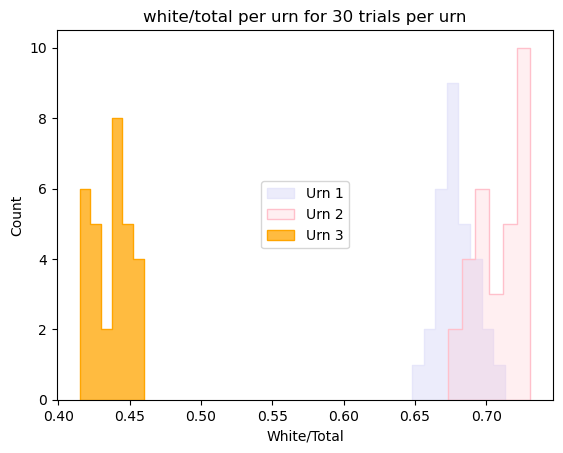

In [116]:
# plots histograms for every urn
sns.histplot(urn1, element="step",fill = True, color = 'lavender', bins='auto', label='Urn 1')
sns.histplot(urn2, element="step",fill = True, color = 'pink', bins='auto', label='Urn 2', alpha = .25)
sns.histplot(urn3, element="step",fill = True, color = 'orange', bins='auto', label='Urn 3')
plt.legend(loc='center')
plt.title(f'white/total per urn for {len(urn1)} trials per urn')
plt.xlabel('White/Total')
plt.savefig('urns', dpi= 700)

<AxesSubplot:ylabel='Count'>

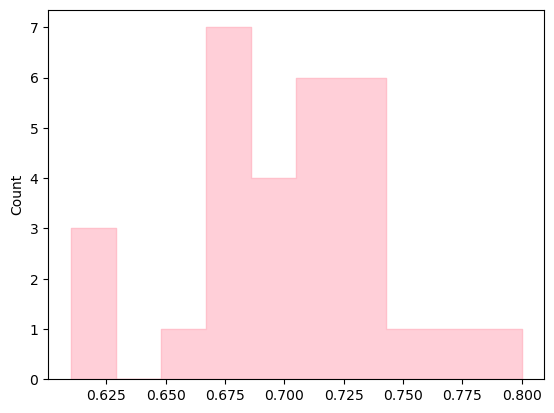

In [76]:
sns.histplot(urn2, element="step",fill = True, color = 'pink', bins=10)

<AxesSubplot:ylabel='Count'>

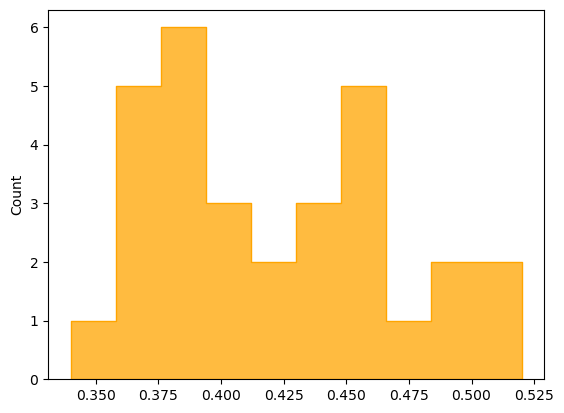

In [75]:
sns.histplot(urn3, element="step",fill = True, color = 'orange', bins=10)